In [1]:
import pytplot
pytplot.cdf_to_tplot('ak_h1_elf_19900218_v03.cdf')

/usr/local/lib/python3.8/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


['dE_wav_narrow',
 'dBx_wav_narrow',
 'dBy_wav_narrow',
 'dBz_wav_narrow',
 'PostGap']

In [2]:
pytplot.data_quants['PostGap'].CDF['VATT']

{'CATDESC': 'Post Gap Quality Flag',
 'DEPEND_0': 'Epoch',
 'DICT_KEY': 'FLAG > post_gap',
 'DISPLAY_TYPE': 'time_series',
 'FIELDNAM': 'Post Gap Quality Flag',
 'FILLVAL': array([4294967295], dtype=uint32),
 'FORMAT': '%10d',
 'LABLAXIS': 'PostGap',
 'VALIDMAX': array([65377], dtype=uint32),
 'VALIDMIN': array([0], dtype=uint32),
 'VAR_NOTE': 'The Quality flag of ELF data\n  1:ELF OFF\n  16:BDR ON\n  32:SMS ON\n 256,512,768:saturation persentage of E\n  1024,2048,3072:saturation persentage of B(Bx)\n  4096,8192,12288:saturation persentage of B(By)\n  16384,32768,49152:saturation persentage of B(Bz)\n  (saturation persentage\n  00:~5%\n  01:5~10%\n  10:10~20%\n  11:20%~\n)',
 'VAR_TYPE': 'data'}

In [4]:
import pytplot
import numpy as np
pytplot.cdf_to_tplot('ak_h1_elf_19900211_v03.cdf')
E = pytplot.get_data('dE_wav_narrow')

import pyspedas
pyspedas.time_string(E.times[0]), pyspedas.time_string(E.times[0] + 24*3600),  E.times[0] + 24*3600 

('1990-02-11 00:57:29.250000', '1990-02-12 00:57:29.250000', 634784249.25)

In [2]:
import pytplot
import numpy as np
pytplot.cdf_to_tplot('ak_h1_elf_19900211_v03.cdf')
E = pytplot.get_data('dE_wav_narrow')

maxE, minE = max(E.y), min(E.y)
time_delta = 1 #s
time_array = np.arange(E.times[0], E.times[0]+int(24*3600/time_delta), time_delta)

saturation_rate = np.empty(time_array.size)

for i in range(time_array.size-1):
    time_index = np.where((E.times >= time_array[i]) & (E.times < time_array[i+1]))
    E_for_time_delta = E.y[time_index]
    
    maxE_index = np.where(E_for_time_delta==maxE)
    minE_index = np.where(E_for_time_delta==minE)
    
    print(time_array[i], maxE_index, minE_index)
    
    saturation_rate[i] = (maxE_index[0].size + minE_index[0].size)/time_index[0].size

pytplot.store_data('saturation_rate', data={'times':time_array, 'y':saturation_rate})
        
pytplot.options('dE_wav_narrow', 'yrange', [-1500, 1500])
pytplot.tplot(['dE_wav_narrow', 'saturation_rate'])

/home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


634262400.75 (array([], dtype=int64),) (array([], dtype=int64),)


ZeroDivisionError: division by zero

In [1]:
from pytplot import cdf_to_tplot, get_data, store_data, options, tplot, tlimit
import numpy as np

cdf_to_tplot('ak_h1_elf_19900211_v03.cdf')
E = get_data('dE_wav_narrow')

maxE, minE = max(E.y), min(E.y)
time_delta = 1 #s
time_array = np.arange(E.times[0], E.times[0]+int(24*3600/time_delta), time_delta)

saturation_rate = np.empty(time_array.size)

for i in range(time_array.size-1):
    time_index = np.where((E.times >= time_array[i]) & (E.times < time_array[i+1]))
    E_for_time_delta = E.y[time_index]
    
    maxE_index = np.where(E_for_time_delta==maxE)
    minE_index = np.where(E_for_time_delta==minE)
    
    print(time_array[i], maxE_index, minE_index)
    try:
        saturation_rate[i] = (maxE_index[0].size + minE_index[0].size)/time_index[0].size
    except:
        saturation_rate[i] = np.nan

store_data('saturation_rate', data={'x':time_array, 'y':saturation_rate})

Efield = E/(30*-2.15*20)
store_data('dE_waveform_narrow', data={'x':E.times, 'y':Efield})
options('dE_wav_narrow', 'yrange', [-1.5, 1.5])
tlimit(['1990-02-11 18:00:00', '1990-02-11 18:15:00'])
tplot(['dE_wav_narrow','saturation_rate'])

/usr/local/lib/python3.8/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


ELF spectram data plot

(10800,) (10800,)
(10799, 128) (10800, 128)
128 128


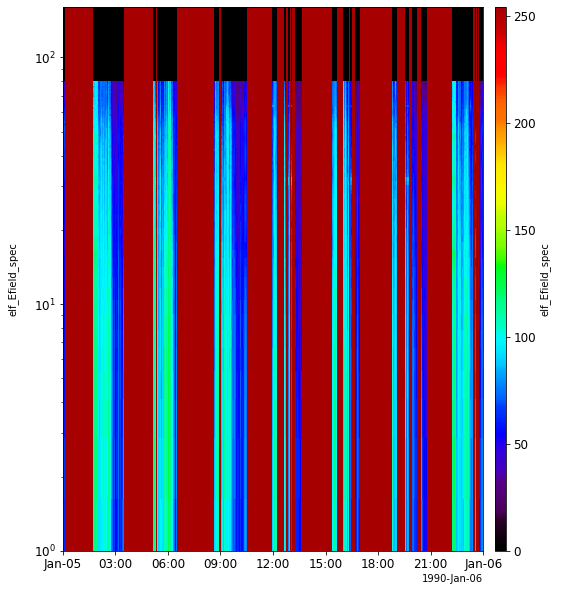

In [77]:
import cdflib
import pyspedas, pytplot

cdf_file1 = cdflib.CDF('./elf/ak_h1_elf_19900104_v01.cdf')
cdf_file2 = cdflib.CDF('./elf/ak_h1_elf_19900105_v01.cdf')

epoch1 = cdf_file1.varget('Epoch')
epoch2 = cdf_file2.varget('Epoch')
E1 = cdf_file1.varget('E')
E2 = cdf_file2.varget('E')
freq1 = cdf_file1.varget('Frequency')
freq2 = cdf_file2.varget('Frequency')

print(epoch1.shape, epoch2.shape)
print(E1.shape, E2.shape)
print(freq1.size, freq2.size)

epoch_unixtime = cdflib.cdfepoch.unixtime(epoch2)
pytplot.store_data('elf_Efield_spec', data={'x':epoch_unixtime, 'y':E2, 'v':freq2})
pytplot.options('elf_Efield_spec', 'spec', 1)
pytplot.options('elf_Efield_spec', 'ylog', 1)
pytplot.tplot('elf_Efield_spec')

In [60]:
epoch = cdf_file2.varget('Epoch')
epoch_unixtime = cdflib.cdfepoch.unixtime(epoch)
import pyspedas
time_string = pyspedas.time_string(epoch_unixtime)
time_string[0], time_string[1]

('1990-01-04 00:00:04.000000', '1990-01-04 00:00:12.000000')

In [6]:
import cdflib
import pyspedas, pytplot

cdf_file = cdflib.CDF('ak_h1_elf_19900206_v03.cdf')
cdf_file.cdf_info()

{'CDF': PosixPath('/home/www/Document/Akebono_analysis_test/Akebono_analysis/VLF_mca/Akebono_ELF_data/ak_h1_elf_19900206_v03.cdf'),
 'Version': '2.7.2',
 'Encoding': 6,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['dE_wav_narrow',
  'dBx_wav_narrow',
  'dBy_wav_narrow',
  'dBz_wav_narrow',
  'E_axis',
  'Mode',
  'Epoch',
  'Epoch_wav_narrow',
  'PostGap'],
 'Attributes': [{'Acknowledgement': 'Global'},
  {'ADID_ref': 'Global'},
  {'Data_type': 'Global'},
  {'Data_version': 'Global'},
  {'Descriptor': 'Global'},
  {'Discipline': 'Global'},
  {'Generated_by': 'Global'},
  {'Generation_date': 'Global'},
  {'Instrument_type': 'Global'},
  {'Logical_file_id': 'Global'},
  {'Logical_source': 'Global'},
  {'Logical_source_description': 'Global'},
  {'Mission_group': 'Global'},
  {'MODS': 'Global'},
  {'PI_affiliation': 'Global'},
  {'PI_name': 'Global'},
  {'Project': 'Global'},
  {'Rules_of_use': 'Global'},
  {'source_name': 'Global'},
  {'TEXT': 'Global'},
  {'Time_resoluti

In [7]:
cdf_file.globalattsget()

{'Acknowledgement': 'AKEBONO VLF-ELF data were provided by Akebono VLF team through the data archive system at Kanazawa University in Japan.',
 'ADID_ref': 'NSSD0241 ',
 'Data_type': 'H1 > High Resolution data',
 'Data_version': '3',
 'Descriptor': 'ELF > ELF Receiver',
 'Discipline': 'Space Physics > Magnetospheric Science',
 'Generated_by': 'KANAZAWA University',
 'Generation_date': '20141106',
 'Instrument_type': 'Radio and Plasma Waves(space)',
 'Logical_file_id': 'AK_H1_ELF_19900206_V03',
 'Logical_source': 'AK_H1_ELF',
 'Logical_source_description': 'Akebono Radio and Plasma Waves High Resolution data',
 'Mission_group': 'Akebono',
 'MODS': ' ',
 'PI_affiliation': 'KANAZAWA University',
 'PI_name': 'I. Nagano',
 'Project': ' ',
 'Rules_of_use': ' In order to confirm the reliability of the data, you are requested to contact the VLF PI, Prof. Isamu Nagano before using the VLF-ELF data in oral/poster presentations. In the publishment, you should contact to the VLF PI and contact per

In [55]:
'E',
'B',
'By_narrow',
'Bz_narrow',
'E_axis',
'Mode',
'Epoch',
'PostGap',
'Frequency'

E = cdf_file.varget('E')
epoch = cdf_file.varget('Epoch')
mode = cdf_file.varget('Mode')

print(mode)

[' ' ' ' ' ' ... 'n' 'n' 'n']


In [34]:
import pyspedas
pyspedas.time_datetime(0)


datetime.datetime(1970, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)